In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import random
from sklearn.feature_selection import GenericUnivariateSelect, f_classif, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso


# my modules
from feature_selection import filter_dataset, select_best_features
import sklearn_utils as sku
from dataset import remove_highly_corr_features, get_highly_corr_features



# Load datas

In [14]:
X = pd.read_csv('extracted_radiomics/f1_gtv.csv', index_col=0)
X.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Contrast
Patient 1,0.814522,0.538269,32.517287,60.410832,70.014145,69.193452,67.541819,76.088009,56480.88058,49.205971,...,2195.246048,0.167640,4.699310,472.840092,15.558839,8102.702635,0.296525,1.216115,0.001020,0.212995
Patient 10,0.601118,0.494290,25.293625,51.171646,50.556283,55.515800,36.629694,55.968608,20277.82059,30.760211,...,1051.112736,0.222741,2.129936,111.705234,8.827930,7684.496715,0.365804,0.258613,0.003409,0.251278
Patient 11,0.601431,0.578848,35.839153,61.914659,63.297750,69.995168,49.332752,77.162898,50525.92301,37.237410,...,1267.815396,0.108203,8.421089,1024.608944,33.158914,5000.201246,0.146653,1.844096,0.000839,0.030869
Patient 12,0.685428,0.596022,28.102245,47.149668,51.802210,52.490050,39.187858,53.118997,28132.71296,32.317691,...,771.049318,0.118096,7.528479,412.334048,27.592127,3882.806555,0.186004,0.965982,0.001794,0.070645
Patient 13,0.846448,0.632900,31.130563,49.187200,56.933452,61.509557,49.494058,62.047144,42280.54162,41.634412,...,1608.637829,0.164113,3.896810,436.350949,15.172210,3633.545195,0.265225,1.061602,0.001125,0.098498


In [2]:
y_train = pd.read_csv('y_train.csv', index_col=0)
y_train.head()

,Récidive Locale,Récidive Méta,Décès,Récidive,Évènement
Patient 1,0,1,1,1,1
Patient 10,0,1,1,1,1
Patient 11,0,1,1,1,1
Patient 12,0,0,0,0,0
Patient 13,0,1,0,1,1


In [3]:
y_val = pd.read_csv('y_val.csv', index_col=0)
y_val.head()

,Récidive Locale,Récidive Méta,Décès,Récidive,Évènement
Patient 34,1,1,0,1,1
Patient 64,1,0,1,1,1
Patient 31,1,1,0,1,1
Patient 76,1,1,0,1,1
Patient 36,1,1,0,1,1


In [4]:
print(y_val['Récidive Locale'].value_counts())
print(y_val['Récidive Méta'].value_counts())
print(y_val['Décès'].value_counts())

Récidive Locale
0    15
1     8
Name: count, dtype: int64
Récidive Méta
1    20
0     3
Name: count, dtype: int64
Décès
0    13
1    10
Name: count, dtype: int64


# Pre-processing

## Remove N/A values

In [17]:
X = X.dropna()

## Remove highly correlated features

In [18]:
correlation_matrix = X.corr(method='pearson') 
X = remove_highly_corr_features(get_highly_corr_features(correlation_matrix), X) #  drop features whom collinearity > 0.9 
X.head()


,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,...,original_glcm_JointEnergy,original_glcm_MCC,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelVariance,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_ZoneEntropy,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Contrast
Patient 1,0.814522,0.538269,32.517287,60.410832,70.014145,69.193452,67.541819,56480.88058,49.205971,0.625791,...,0.002792,0.856873,418.135828,113.189229,39399.38790,0.389653,7.223195,8102.702635,1.216115,0.212995
Patient 10,0.601118,0.494290,25.293625,51.171646,50.556283,55.515800,36.629694,20277.82059,30.760211,0.579081,...,0.001277,0.845759,104.902913,139.164351,9675.43765,0.381291,7.360274,7684.496715,0.258613,0.251278
Patient 11,0.601431,0.578848,35.839153,61.914659,63.297750,69.995168,49.332752,50525.92301,37.237410,0.654873,...,0.011583,0.638003,830.577741,15.102531,479339.60330,0.309313,6.792426,5000.201246,1.844096,0.030869
Patient 12,0.685428,0.596022,28.102245,47.149668,51.802210,52.490050,39.187858,28132.71296,32.317691,0.733029,...,0.008098,0.781325,336.776263,35.013862,117195.43570,0.338525,6.830888,3882.806555,0.965982,0.070645
Patient 13,0.846448,0.632900,31.130563,49.187200,56.933452,61.509557,49.494058,42280.54162,41.634412,0.695784,...,0.003425,0.715065,389.544197,47.911558,21817.98713,0.355429,7.073258,3633.545195,1.061602,0.098498


In [19]:
features_list = X.columns

## Keep only one outcome

In [20]:
outcome = 'Décès'

y_train = y_train.loc[:, [outcome]]
y_val = y_val.loc[:, [outcome]]

## Separate train and val in X

In [21]:
X_train = X.drop(y_val.index)
# drop from x_train the index that are not in y_train
X_train = X_train.loc[X_train.index.isin(y_train.index)]
X_val = X.loc[X.index.isin(y_val.index)] 

In [22]:
# reorganize y 
y_train = y_train.values.reshape(-1, 1).ravel() # to avoid errors
y_val = y_val.values.reshape(-1, 1).ravel() # to avoid errors

In [ ]:
assert len(X_train) == len(y_train), print(len(X_train), len(y_train))
assert len(X_val) == len(y_val), print(len(X_val), len(y_val))

## Normalization

In [24]:
min_max_scaler = MinMaxScaler() # chi2 test does not work with negative values
min_max_scaled_x_train = min_max_scaler.fit_transform(X_train)
min_max_scaled_x_val = min_max_scaler.fit_transform(X_val)

In [25]:
znorm_scaler = StandardScaler()
znorm_scaled_x_train = znorm_scaler.fit_transform(X_train)
znorm_scaled_x_val = znorm_scaler.fit_transform(X_val)

# Feature selection

In [34]:
max_features = 2

## Random selection

In [42]:
rdm_sel_features = random.sample(list(features_list), max_features)
print('Random selected features:', rdm_sel_features)

Random selected features: ['original_firstorder_Entropy', 'original_shape_Elongation']


## ANOVA test

In [35]:
selector = GenericUnivariateSelect(score_func=f_classif, mode='percentile', param=max_features+1) # param selects n-1 features

X_selected = selector.fit_transform(znorm_scaled_x_train, y_train)

anova_sel_features = selector.get_feature_names_out(features_list)

In [36]:
print('ANOVA selected features:', anova_sel_features)

ANOVA selected features: ['original_shape_Sphericity' 'original_glcm_Idmn']


## LASSO

In [62]:
param_grid = {'alpha' : list(np.arange(0.01, 0.11, 0.01))} # regularizer tuning
estimator = Lasso(random_state=42) 
grid_lasso = sku.hyper_parameters_search(estimator, znorm_scaled_x_train, y_train, param_grid, scorer='f1', cv=5)

In [69]:
lasso_sel_features = list(select_best_features(grid_lasso.best_estimator_.coef_, features_list, n_features=max_features).keys())
print('Lasso selected features:', lasso_sel_features)

Lasso selected features: ['original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_glcm_MCC']


# Predictions

In [43]:
SCORER = 'f1'

## Random Forest

In [71]:
param_grid = {'max_depth': range(1, 21, 4), 'n_estimators' : range(25, 1001, 25)} # hyperparameters to search

### W/ random selected features

In [53]:
estimator = RandomForestClassifier(random_state=42) 
_, X_train_filtered, X_val_filtered = filter_dataset(X_train, X_val, rdm_sel_features, max_features, features_list)
grid_rf = sku.hyper_parameters_search(estimator, X_train_filtered, y_train, param_grid, scorer=SCORER, cv=5) 

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	100.00	34.78
SEN:	100.00	40.00
SPE:	100.00	30.77
PPV:	100.00	30.77
F1:	100.00	34.78


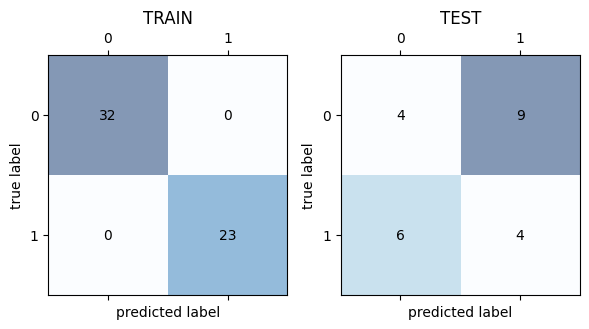

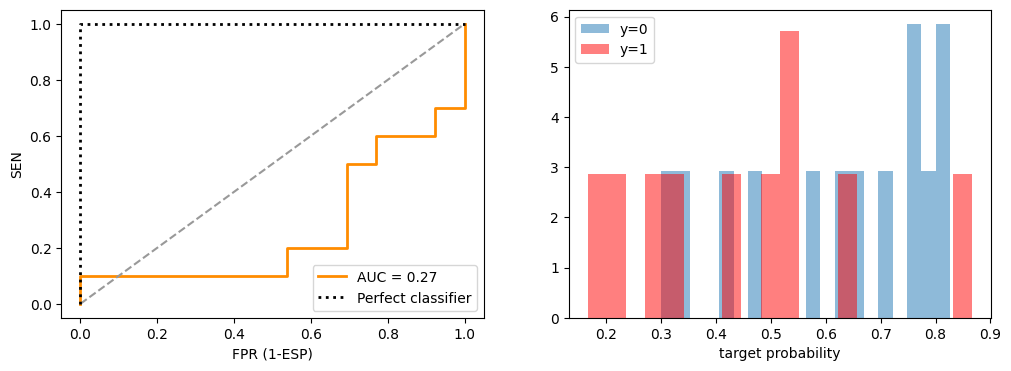

In [54]:
sku.analyze_train_test_performance(grid_rf.best_estimator_ , X_train_filtered, X_val_filtered, y_train, y_val)

### W/ ANOVA selected features

In [51]:

estimator = RandomForestClassifier(random_state=42) 
_, X_train_filtered, X_val_filtered = filter_dataset(X_train, X_val, anova_sel_features, max_features, features_list)
grid_rf = sku.hyper_parameters_search(estimator, X_train_filtered, y_train, param_grid, scorer=SCORER, cv=5) 

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	100.00	56.52
SEN:	100.00	40.00
SPE:	100.00	69.23
PPV:	100.00	50.00
F1:	100.00	44.44


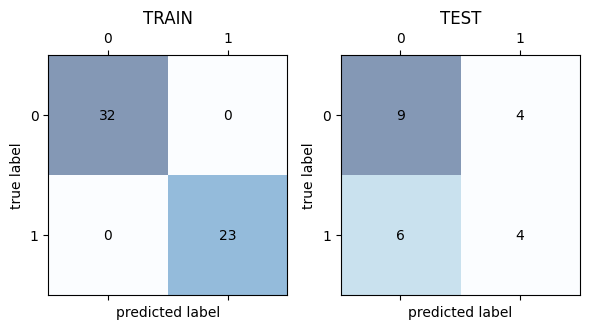

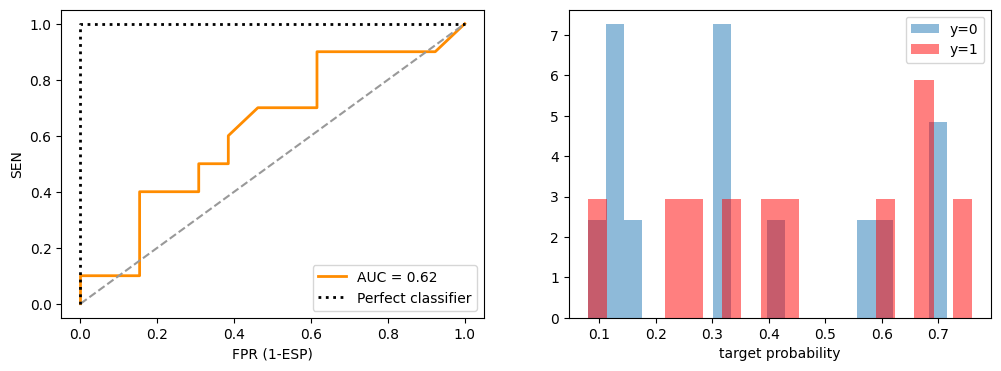

In [52]:
sku.analyze_train_test_performance(grid_rf.best_estimator_ , X_train_filtered, X_val_filtered, y_train, y_val)

### W/ Lasso selected features

In [72]:
estimator = RandomForestClassifier(random_state=42) 
_, X_train_filtered, X_val_filtered = filter_dataset(X_train, X_val, lasso_sel_features, max_features, features_list)
grid_rf = sku.hyper_parameters_search(estimator, X_train_filtered, y_train, param_grid, scorer=SCORER, cv=5) 

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	100.00	56.52
SEN:	100.00	30.00
SPE:	100.00	76.92
PPV:	100.00	50.00
F1:	100.00	37.50


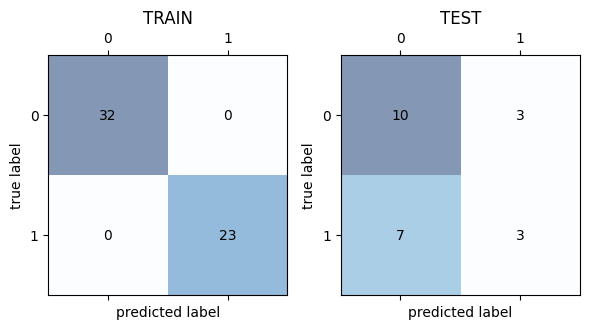

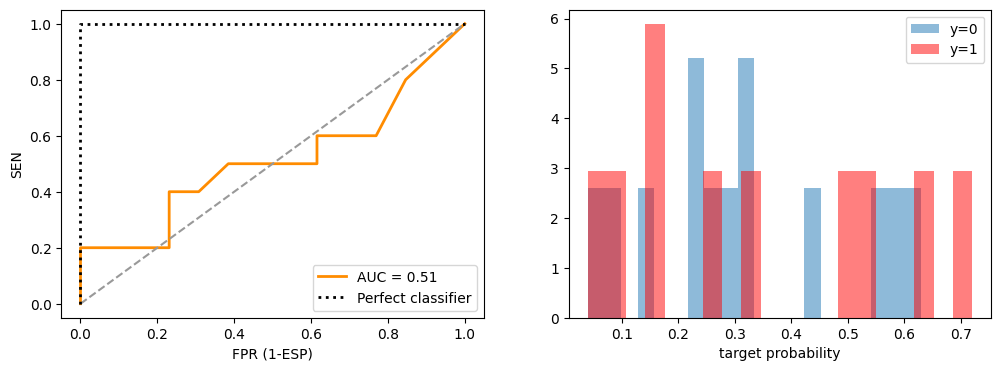

In [73]:
sku.analyze_train_test_performance(grid_rf.best_estimator_ , X_train_filtered, X_val_filtered, y_train, y_val)